## Importar librerías

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

## Importar algoritmo PCA hecho a mano

In [7]:
%run "Algoritmo PCA.ipynb"

## Importar dataset Iris

- Esta compuesto por 150 *datapoints* correspondientes a flores de 3 especies distintas de plantas del genero *Iris*:
    - Iris setosa
    - Iris virginica
    - Iris versicolor
- Cada *datapoint* es ta compuesto por 4 *features*:
    - Largo de sépalo en cm
    - Ancho de sépalo en cm
    - Largo de pétalo en cm
    - Ancho de pétalo en cm
- A su vez se dispone de las etiquetas de la clasificación correcta de cada *datapoint*.


In [3]:
data = datasets.load_iris()
X = data.data
y = data.target

## Aplicar algoritmo PCA

- Se usa algoritmo PCA implementado manualmente (ver *notebook* **Algoritmo PCA**).
- Se usan dos direcciones principales para tener dos componentes por dato y poder graficar en 2D.

In [13]:
# Crear instancia de clase PCA con n_component = 2
pca = PCA(2)
# Calcular la matriz de eigenvectors principales (matriz "componentes") necesaria para proyectar datos
pca.fit(X)
# Proyectar datos a 2 dimensiones haciendo producto punto con matriz "componentes"
X_proyectado = pca.transform(X)

## Graficar resultados

- Gráfico tipo scatter donde cada dato se grafica según la proyección en 2 componentes principales.
- En el eje *x* se muestra el valor del 1° componentes principal y en el eje *y* el valor del 2° componentes principal.
- Se colorea cada dato según su etiqueta real.

C:\Users\rhv71\AppData\Local\Temp\ipykernel_19096\557645703.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_proyectado[:, 0], X_proyectado[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))


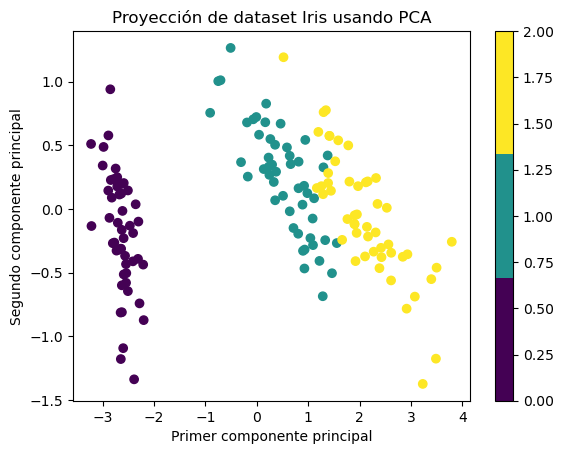

In [50]:
plt.scatter(X_proyectado[:, 0], X_proyectado[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))

plt.title("Proyección de dataset Iris usando PCA")
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal")
plt.colorbar()
plt.savefig("PCA_manual.svg")
plt.show()

## Comparación con algoritmo de Scikit Learn

### Importación de PCA

In [ ]:
from sklearn.decomposition import PCA

### Proyección de datos con algoritmo

- Se usan dos direcciones principales para comparar directamente con resultados manuales.

In [ ]:
pca_sk = PCA(2)
pca_sk.fit(X)
X_proyectado_sk = pca_sk.transform(X)

### Gráfico de resultados

- Se grafica a la izquierda los resultados con algoritmo implementado a mano.
- Se grafica a la derecha los resultados con algoritmo de Scikit Learn.

C:\Users\rhv71\AppData\Local\Temp\ipykernel_19096\4268451095.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s1 = ax[0].scatter(X_proyectado[:, 0], X_proyectado[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))
C:\Users\rhv71\AppData\Local\Temp\ipykernel_19096\4268451095.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s2 = ax[1].scatter(X_proyectado_sk[:, 0], X_proyectado_sk[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))


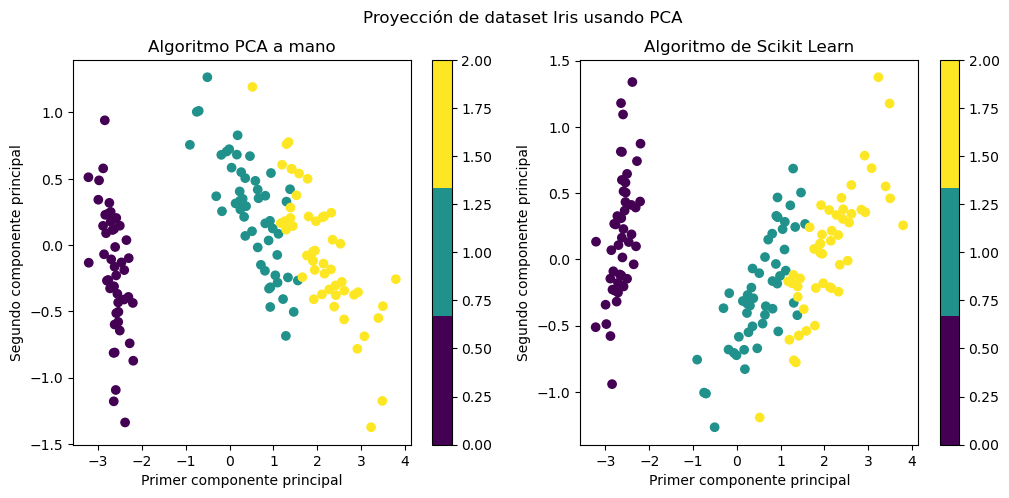

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.suptitle("Proyección de dataset Iris usando PCA")

s1 = ax[0].scatter(X_proyectado[:, 0], X_proyectado[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))
s2 = ax[1].scatter(X_proyectado_sk[:, 0], X_proyectado_sk[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))

ax[0].set_title("Algoritmo PCA a mano")
ax[0].set_xlabel("Primer componente principal")
ax[0].set_ylabel("Segundo componente principal")

ax[1].set_title("Algoritmo de Scikit Learn")
ax[1].set_xlabel("Primer componente principal")
ax[1].set_ylabel("Segundo componente principal")

fig.colorbar(s1)
fig.colorbar(s2)
plt.savefig("PCA_comparacion_1.svg")
plt.show()

### Gráfico invertido

- Se puede ver que ambos resultados son similares pero no iguales.
- Notar que la única diferencia es que estan volteados verticalmente.
- Se hace el mismo gráfico, solo cambiando el signo del segundo componente de los datos proyectados con algoritmo manual.
- Se puede ver como ahora los resultados son idénticos.

C:\Users\rhv71\AppData\Local\Temp\ipykernel_19096\2643870205.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s1 = ax[0].scatter(X_proyectado[:, 0], -X_proyectado[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))
C:\Users\rhv71\AppData\Local\Temp\ipykernel_19096\2643870205.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s2 = ax[1].scatter(X_proyectado_sk[:, 0], X_proyectado_sk[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))


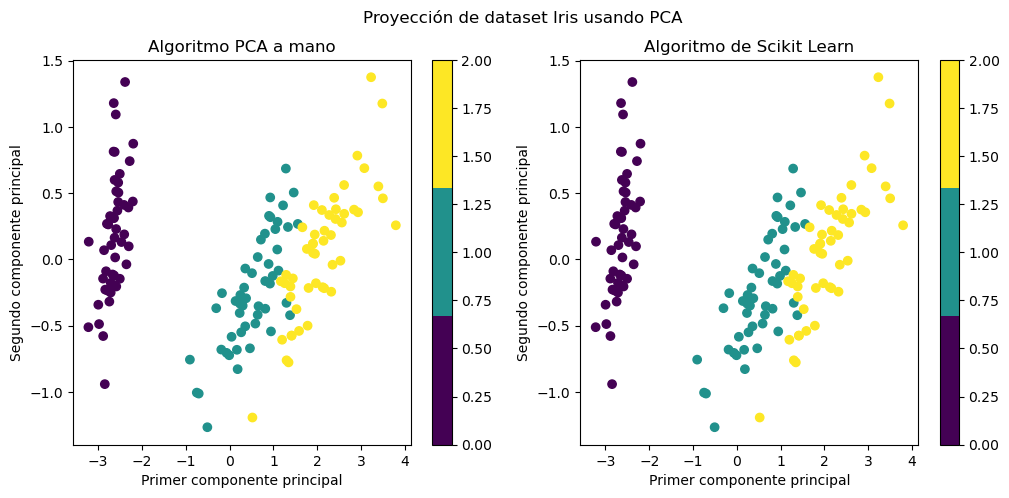

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.suptitle("Proyección de dataset Iris usando PCA")

# Notar cambio de signo -X_proyectado[:, 1]
s1 = ax[0].scatter(X_proyectado[:, 0], -X_proyectado[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))
s2 = ax[1].scatter(X_proyectado_sk[:, 0], X_proyectado_sk[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 3))

ax[0].set_title("Algoritmo PCA a mano")
ax[0].set_xlabel("Primer componente principal")
ax[0].set_ylabel("Segundo componente principal")

ax[1].set_title("Algoritmo de Scikit Learn")
ax[1].set_xlabel("Primer componente principal")
ax[1].set_ylabel("Segundo componente principal")

fig.colorbar(s1)
fig.colorbar(s2)
plt.savefig("PCA_comparacion_2.svg")
plt.show()